In [84]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
X = df.iloc[: , 3:13]
y = df.iloc[: , 13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [86]:
df['Geography'].unique()
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)



In [87]:
X = pd.concat([X , geography , gender] , axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [91]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [90]:
X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [101]:
X_train.shape

(8000, 11)

In [103]:
# Now let's make ANN
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(6 , input_shape = (11,) , activation = 'relu' , kernel_initializer="he_uniform"),
    keras.layers.Dense(6 , activation = 'relu' , kernel_initializer = "he_uniform"),
    keras.layers.Dense(1 , activation = 'sigmoid' , kernel_initializer = "glorot_uniform")
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [104]:
model.fit(X_train , y_train , epochs = 100 , batch_size = 10 , validation_split = 0.33)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7265 - loss: 0.5967 - val_accuracy: 0.7959 - val_loss: 0.5037
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8061 - loss: 0.4730 - val_accuracy: 0.7978 - val_loss: 0.4709
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7972 - loss: 0.4540 - val_accuracy: 0.8005 - val_loss: 0.4553
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4305 - val_accuracy: 0.8039 - val_loss: 0.4464
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7975 - loss: 0.4523 - val_accuracy: 0.8076 - val_loss: 0.4423
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8059 - loss: 0.4339 - val_accuracy: 0.8092 - val_loss: 0.4378
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8075 - loss: 0.4262 - val_accuracy: 0.8107 - val_loss: 0.4342
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8199 - loss: 0.4187 - val_accu

In [106]:
model.evaluate(X_test , y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8674 - loss: 0.3344


[0.34273990988731384, 0.8640000224113464]

In [113]:
y_predicted = model.predict(X_test)
y_predicted = (y_predicted > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


In [114]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1542,   53],
       [ 219,  186]], dtype=int32)>

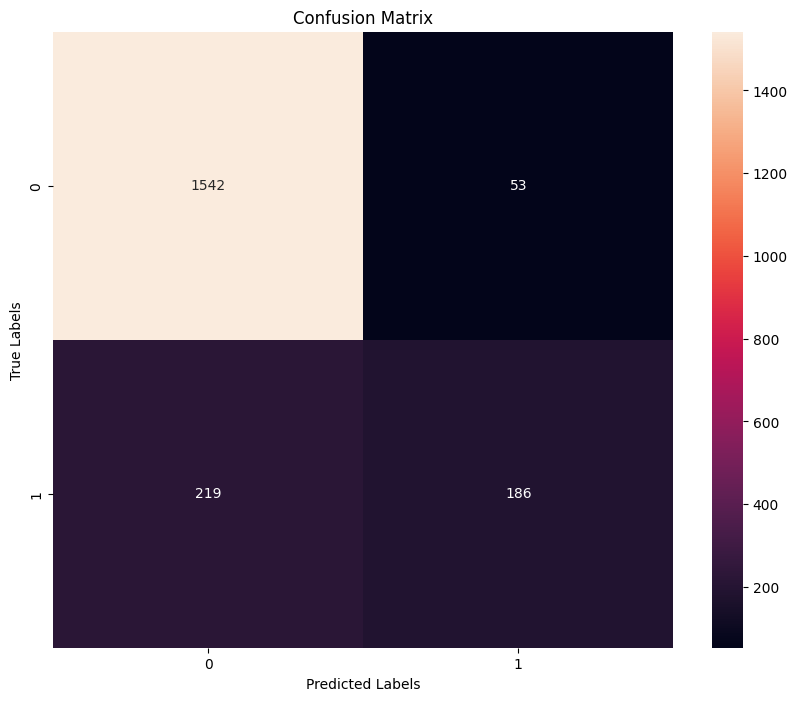

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'cm' is your NumPy confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [118]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_predicted)
score

0.864